In [41]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
import statsmodels.formula.api as smf

In [44]:
#import the data in dataframe with pandas module
df=pd.read_csv("C:\\Users\\ASUS\\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA And Data Visualization

In [45]:
#information about the columns
#it has no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [46]:
#renaming the column
df=df.rename(columns={'Delivery Time':'dt','Sorting Time':'st'})
print(df)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [47]:
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [48]:
df.describe() #by using this function we get mean, standard deviation, minimum and max value of each column 

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='dt', ylabel='Density'>

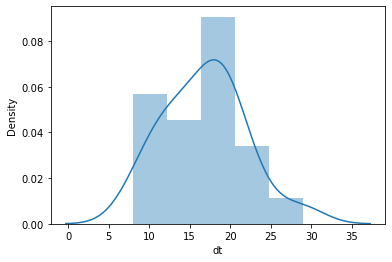

In [49]:
#It is used to show the data distribution.
import seaborn as sns
sns.distplot(df['dt'])   #it is a normal distributed data with bell curve

<AxesSubplot:xlabel='st', ylabel='Density'>

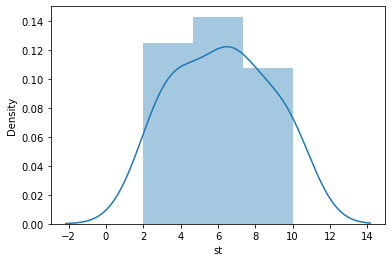

In [50]:
sns.distplot(df['st']) #it is also a normal distrubuted data which having a bell curve

<AxesSubplot:xlabel='st', ylabel='dt'>

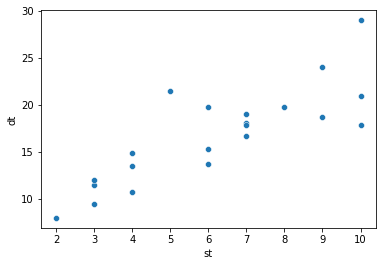

In [54]:
# scatterplot of input variable i.e., sorting time Vs. output variable i.e., delivery time
sns.scatterplot(x = df['st'], y = df['dt'])

<AxesSubplot:xlabel='st', ylabel='dt'>

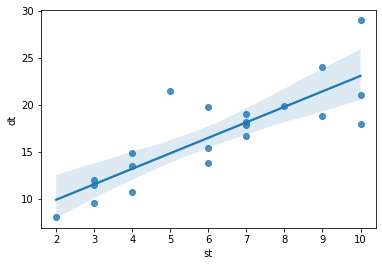

In [93]:
sns.regplot(x = df['st'], y = df['dt'])

# Correleation Analysis

In [51]:
df.corr()  # is used to find the pairwise correlation of all columns in the dataframe.

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


# Model Building , Model Training & Model Testing Using statsmodel

In [97]:
import statsmodels.formula.api as smf

In [100]:
linear_model=smf.ols(formula='dt~st', data=df).fit()
linear_model

In [101]:
#Finding slope and intercept
linear_model.params

Intercept    6.582734
st           1.649020
dtype: float64

# Model Testing

In [103]:
#Finding tvalues, pvalues
linear_model.tvalues, linear_model.pvalues

(Intercept    3.823349
 st           6.387447
 dtype: float64,
 Intercept    0.001147
 st           0.000004
 dtype: float64)

# Model Predictions

In [104]:
#Manual prediction for say sorting time= 5
#y=mx+c
delivery_data = 1.649020*5+6.582734
delivery_data

14.827834

In [107]:
##Automated prediction for say sorting time = 5,10
new_data = pd.DataFrame(data={'st':[5,10]})
new_data

,st
0,5
1,10


In [108]:
Delivery_time=linear_model.predict(new_data)
Delivery_time

0    14.827833
1    23.072933
dtype: float64

In [111]:
##Automated prediction for say sorting time = 12,2
new_data = pd.DataFrame(data={'st':[12,2]})
new_data

,st
0,12
1,2


In [112]:
Delivery_time=linear_model.predict(new_data)
Delivery_time

0    26.370973
1     9.880774
dtype: float64

# Model prediction is DONE

# =============================================================================

# 2.Build a prediction model for salary Hike

# 1. Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 2. Import Data

In [3]:
df=pd.read_csv("C:\\Users\\ASUS\\Downloads\\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# data understanding

In [4]:
df.info()       # no null entry 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.shape

(30, 2)

In [7]:
df[df.duplicated()].shape

(0, 2)

In [8]:
#checking for null entries
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
#check whether all the integer should be float or integer
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

# Assumptions check
1.normality test

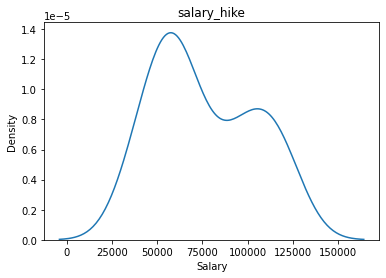

In [10]:
sns.distplot(df['Salary'], hist=None)
plt.title('salary_hike')
plt.show()

In [11]:
df.Salary.skew()

0.35411967922959153

In [12]:
df.Salary.kurt()

-1.295421086394517

2. linearity test

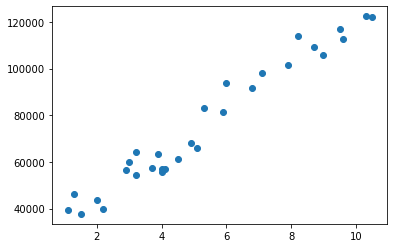

In [13]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'])  #data is linear

# model building

In [14]:
import statsmodels.formula.api as smf

In [15]:
linear_model=smf.ols(formula = 'Salary ~ YearsExperience',data = df).fit()

# model training

In [16]:
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [80]:
linear_model.summary()   #r squared:0.957 hence it is good model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        21:57:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model testing

1.manual prediction

In [82]:
#if years of experience would be 2 then what will be the salary- 61034.362719
( 25792.200199)+(9449.962321)*(2)


44692.124841

In [81]:
#if years of experience would be 3 then what will be the salary
(25792.200199)+(9449.962321)*(3)

54142.087162

2. automatic prediction

In [71]:
x_test=pd.DataFrame(data={'YearsExperience':[2,3]})

In [72]:
x_test

,YearsExperience
0,2
1,3


In [83]:
linear_model.predict(x_test)

0    44692.124842
1    54142.087163
dtype: float64

# model deployment

In [84]:
from pickle import dump

In [85]:
dump(linear_model,open('linear_intelligence.pkl','wb'))

In [86]:
from pickle import load

In [87]:
loaded_lin_model=load(open('linear_intelligence.pkl','rb'))

In [88]:
print(x_test)

   YearsExperience
0                2
1                3


In [89]:
loaded_lin_model.predict(x_test)

0    44692.124842
1    54142.087163
dtype: float64